# 주성분분석(PCA)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 주성분 분석
from sklearn.decomposition import PCA
# 상관계수 계산
from scipy import stats
# 데이터 표Select items to perform actions on them.  ￼￼Choose Files Upload준화 함수
from sklearn.preprocessing import StandardScaler

In [8]:
ds_supervisor = pd.read_csv('./실습파일/직무능력평가.csv', engine = 'python')
# 데이터 분할: Y와 Xs 분리
ds_supervisor_x = ds_supervisor.drop("EVAL", axis = 1)
ds_supervisor_y = ds_supervisor["EVAL"]
ds_supervisor_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


## 상관분석 및 산점도 행렬

In [9]:
ds_supervisor_x.corr()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
PRIVILEGE,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
CHANCE,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
ADVANCE,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
CRITISM,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
PROMOTION,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


### DISSATIS와 ADVANCE / CHANCE와 ADVANCE 간에 높은 선형적 상관관계가 존재 (0.669 / 0.640)

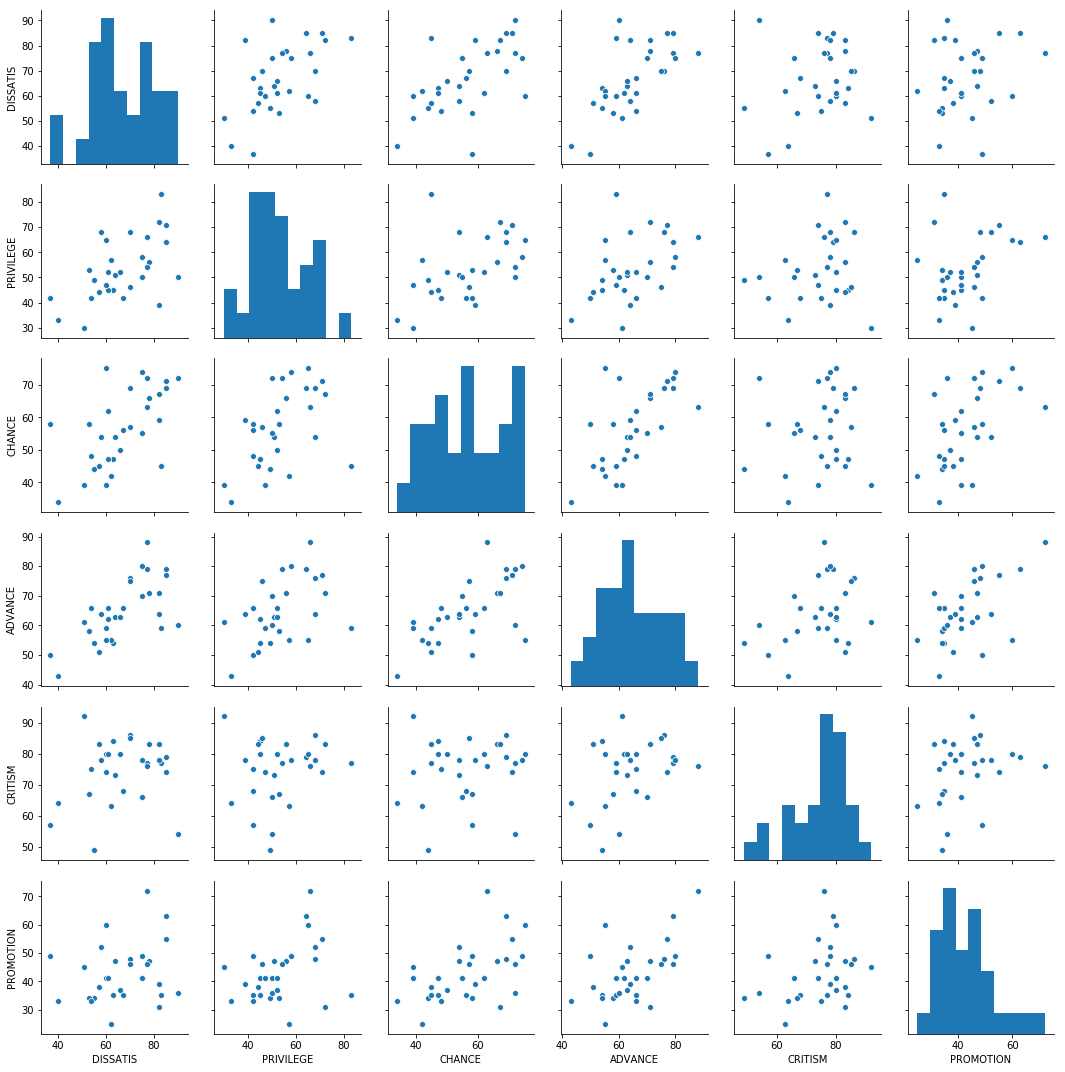

In [10]:
sns.pairplot(ds_supervisor_x)

### 산점도 행렬 상에서 봤을 때도 그러함.

## 데이터 표준화(이유: 설명변수 간에 단위(scale)가 다름.)

In [12]:
# 데이터 표준화
scaler = StandardScaler()
# 데이터 표준화 변환
ds_supervisor_x_scaled = scaler.fit_transform(ds_supervisor_x)
# 표준화된 데이터 확인
print("Scaled Data:\n {}".format(ds_supervisor_x_scaled[:5].round(3)))
# 데이터 형태 확인
print("Shape:\n {}".format(ds_supervisor_x_scaled.shape))

Scaled Data:
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
 (30, 6)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 주성분 분석 실행

In [14]:
# 주성분 분석 모델 생성. prin 1~6까지
pca = PCA(n_components=6)
# prin1~6까지의 새로운 변수 값을 생성
x_pca = pca.fit_transform(ds_supervisor_x_scaled) #.round(3) 해도 되고 안해도 되고
# 계산된 prin1~6 주성분 변수의 5번째 값까지 확인
print("PCA Data:\n {}".format(x_pca[:5]))
# Shape: prin1~6까지의 Row개수, Column개수 확인
print("Shape:\n {}".format(x_pca.shape))
# 주성분 점수 저장. prin1~6
ds_x_pca = pd.DataFrame(x_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])

PCA Data:
 [[ 1.676 -2.739 -0.128 -0.503  0.243  0.226]
 [ 0.218 -0.126  0.431  0.087  0.196  0.194]
 [-2.105 -0.515 -0.277  0.491 -0.447 -0.632]
 [ 1.36  -0.861 -0.918  0.032 -0.401  0.441]
 [-1.512 -0.353 -0.327 -0.329 -0.327  0.212]]
Shape:
 (30, 6)


## 고유값(Eigenvalue) 확인(몇 개까지 가져갈 지 보기위해)

In [15]:
# 주성분 통계량 입력용 새로운 데이터 프레임 생성
ds_pca = pd.DataFrame()
# 주성분 분석 모델의 주성분 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [i for i in range(1,7)]
ds_pca["EigenValues"] = pca.explained_variance_ ##Eigen values
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_ ##Eighen values ratio
ds_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


## 고유벡터(Eigenvector)확인

In [17]:
# 주성분 통계량 입력용 새로운 데이터 프레임 생성
ds_feature = pd.DataFrame({"Feature":ds_supervisor_x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
ds_eigenvectors = pd.concat([ds_feature,pd.DataFrame(pca.components_,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis = 1)
ds_eigenvectors

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,-0.439375,-0.394711,-0.461401,-0.492658,-0.224813,-0.380801
1,PRIVILEGE,0.312642,0.308751,0.217087,-0.115532,-0.802247,-0.320706
2,CHANCE,-0.445167,-0.217414,0.271981,-0.005605,-0.457246,0.686643
3,ADVANCE,-0.316019,0.814847,-0.224796,-0.365108,0.099947,0.205742
4,CRITISM,0.191521,0.037686,-0.775648,0.460364,-0.288875,0.254728
5,PROMOTION,0.611949,-0.190294,-0.117671,-0.631404,0.057847,0.416465


## Scree Plot 확인

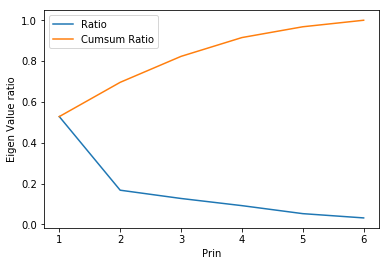

In [20]:
# 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"],label = "Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueRatio"],label="Cumsum Ratio")
# 그래프 label, legend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc="best")

### EigenValue 기준 2개의 주성분으로 약 70%를 설명할 수 있음.

## 주성분 데이터 상관관계

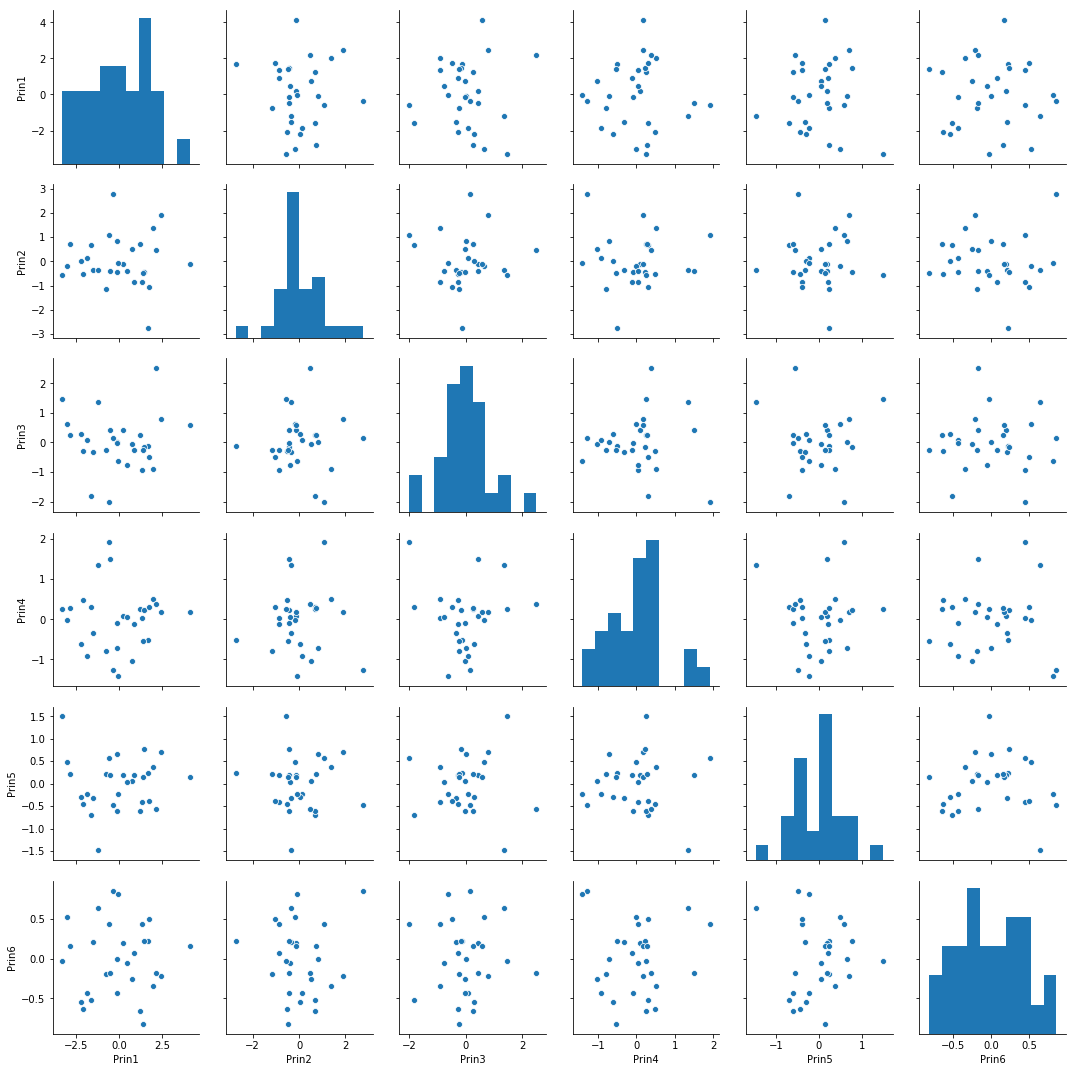

In [21]:
sns.pairplot(ds_x_pca)

In [22]:
ds_x_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,0.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0,0.0,0.0
Prin4,0.0,-0.0,-0.0,1.0,0.0,0.0
Prin5,-0.0,-0.0,0.0,0.0,1.0,-0.0
Prin6,-0.0,-0.0,0.0,0.0,-0.0,1.0


### 주성분 간에는 독립이란 의미!

In [24]:
# 회귀분석 패키지 불러오기
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Scree plot을이용하여 선택한 주성분
x_var = ["Prin1","Prin2"]
# 기존 주성분 데이터에 절편(Intercept)컬럼 추가
ds_x_pca_const = sm.add_constant(ds_x_pca[x_var])
# train, test 데이터로분할
X_train, X_test, y_train, y_test = train_test_split(ds_x_pca_const, ds_supervisor_y, test_size = 0.3, random_state = 2222)
# train 데이터로 회귀분석 모델 생성
reg_model = sm.OLS(y_train, X_train)
# fit: 회귀모형의 fit line 생성
reg_model = reg_model.fit()
# Summary(): 회귀분석 통계량 결과 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     19.54
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           3.09e-05
Time:                        13:14:30   Log-Likelihood:                -71.656
No. Observations:                  21   AIC:                             149.3
Df Residuals:                      18   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.5554      1.744     37.025      0.0

# 군집분석

In [25]:
# linkage: 계층형 군집분석
# dendrogram
# fcluster: linkage로부터 얻은 값으로 군집생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# KMeans 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

In [26]:
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


## 데이터 전처리 - Scaling

In [27]:
scaler = StandardScaler()
ds_supervisor_scaled = scaler.fit_transform(ds_supervisor)
ds_supervisor_scaled[:5]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

## 역할 정의

In [31]:
# 목표 변수
ds_supervisor_y = ds_supervisor_scaled[:,0]
# 설명 변수
ds_supervisor_x = ds_supervisor_scaled[:,1::]

## Dendrogram

Text(0, 0.5, 'sample index')

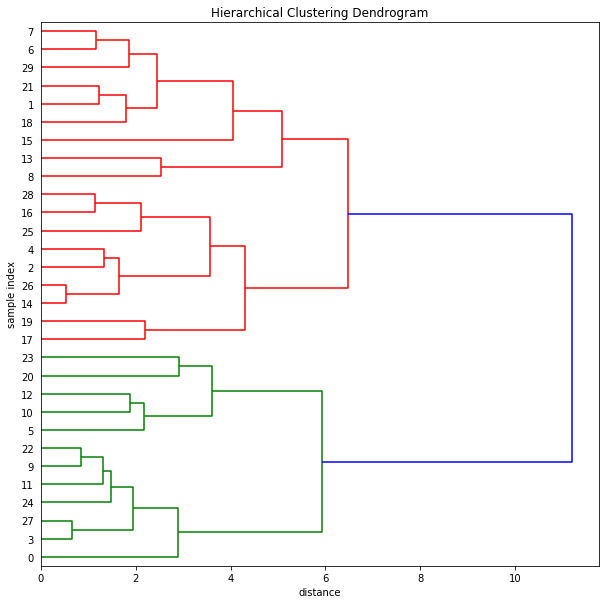

In [32]:
# 연결: ward, 거리 계산: Euclidean
Z_ward = linkage(ds_supervisor_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 게산: Euclidean
Z_average = linkage(ds_supervisor_x, method = "average", metric = "euclidean")
# 연결: average, 거리 계산: minkowski
Z_Minkowski = linkage(ds_supervisor_x, method = "average", metric = "minkowski")
# 덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

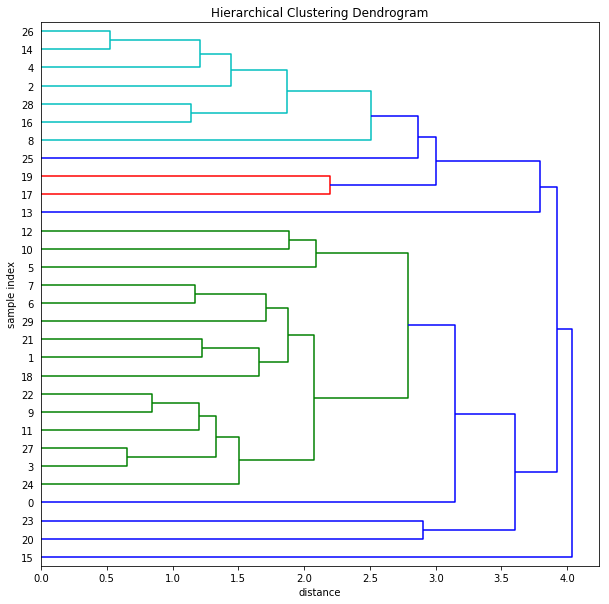

In [35]:
# 덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

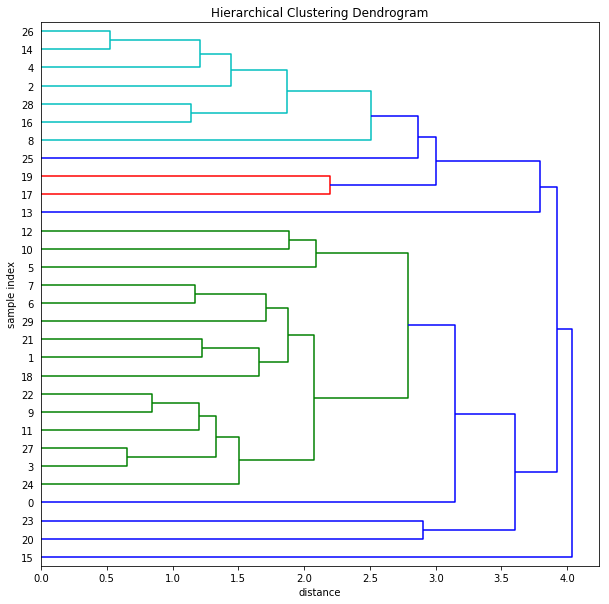

In [36]:
# 덴드로그램[연결: average, 거리 계산: Minskowski]
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_Minkowski, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

## 계층형 군집 생성

In [40]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t=5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
ds_supervisor["ClusterHierarchical"] = cluster_hierarchical
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


## 군집별 데이터 요약

In [42]:
# 집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = ds_supervisor.groupby("ClusterHierarchical").agg(["min","mean","max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0+"_"+level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


## K-평균 군집분석
- 군집 개수 찾기: 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합

In [46]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range =[i+1 for i in range(n_iter_cluster)]
clus_error = []
for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(ds_supervisor_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error":clus_error})
ds_error.round(3)

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,94.687
3,4,80.264
4,5,68.770
5,6,59.478
6,7,50.300
7,8,44.244
8,9,39.422
9,10,32.926


Text(0, 0.5, 'Sum of squared distance')

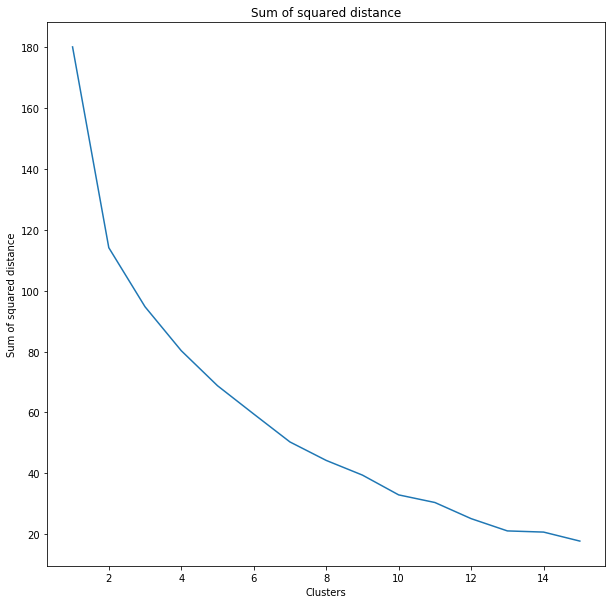

In [47]:
plt.figure(figsize = (10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

## K-평균 군집 번호 생성

In [56]:
clus = KMeans(5)
clus.fit(ds_supervisor_x)
cluster_kmeans = [i+1 for i in clus.labels_]
ds_supervisor["ClusterKmeans"] = cluster_kmeans
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,4
1,63,64,51,54,63,73,47,5,4
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,4
4,81,78,56,66,71,83,47,3,3


## K-평균 군집별 데이터 요약

In [49]:
ds_summary_km = ds_supervisor.drop("ClusterHierarchical", axis = 1, inplace = False).\
groupby("ClusterKmeans").agg(["min","mean","max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.cloumns = level0+'_'+level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


ClusterKmeans EVAL             DISSATIS             PRIVILEGE              \
                 min    mean max      min    mean max       min    mean max   
0             1   40  50.500  69       37  48.500  62        33  45.250  57   
1             2   58  71.400  82       67  76.800  90        39  45.400  50   
2             3   65  74.625  85       60  75.875  85        54  62.750  71   
3             4   43  58.455  67       51  58.909  66        30  48.091  68   
4             5   68  70.000  72       82  82.500  83        72  77.500  83   

  ... CHANCE ADVANCE             CRITISM             PROMOTION              
  ...    max     min    mean max     min    mean max       min    mean max  
0 ...     58      43  50.500  55      49  58.250  64        25  35.250  49  
1 ...     72      60  67.000  75      54  70.200  85        35  39.400  46  
2 ...     75      55  75.625  88      74  79.125  86        46  55.000  72  
3 ...     62      51  60.636  66      67  78.727  92        33  40.364  52  
4 ...     67      59  65.000  71      77  80.000  83        31  33.000  35  

[5 rows x 22 columns]

## DBSCAN 군집분석

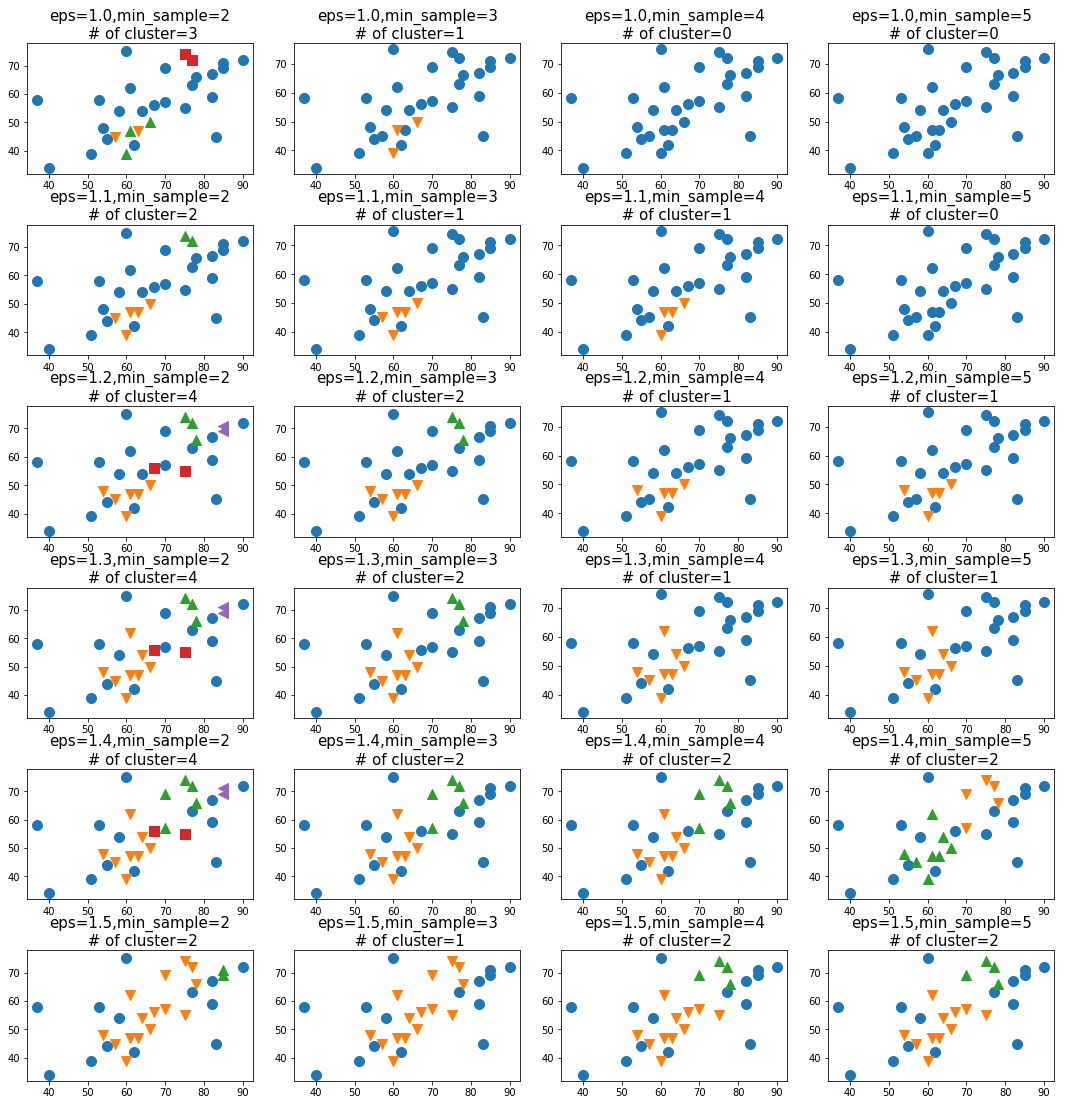

In [52]:
# X축: DISSATIS 변수, Y축: CHANCE
X = ds_supervisor["DISSATIS"]
Y = ds_supervisor["CHANCE"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s","<",">","p","D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15,15)) # plot 개수
fig.tight_layout(w_pad = 1, h_pad = 3) # plot간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(ds_supervisor_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for(n_clus,clus) in enumerate(range(min(clusters), max(clusters)+1, 1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s= 100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+\
                               "\n # of cluster="+str(max(clusters)), fontsize = 15)

In [57]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(ds_supervisor_x)
# 군집 결과
cluster_dbscan = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균의 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i,val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i]+1
ds_supervisor["ClusterDBScan"] = cluster_dbscan
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,4,0
1,63,64,51,54,63,73,47,5,4,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,4,1
4,81,78,56,66,71,83,47,3,3,2


In [58]:
# DB 스캔 군집별 요약 통계량
ds_summary_db = ds_supervisor.drop(["ClusterHierarchical","ClusterKmeans"], axis=1, inplace=False).\
groupby("ClusterDBScan").agg(["min","mean","max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0+"_"+level1
ds_summary_db.reset_index(inplace=True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
